In [35]:
import numpy as np
import matplotlib.pyplot as plt
import torch

Show walls map: 


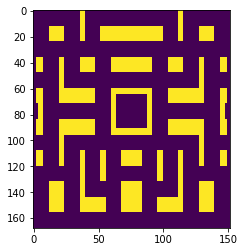

In [36]:
screen = np.load("saved_objects/walls_matrix.npy")
screen = np.concatenate((np.zeros((screen.shape[0], 1)), screen), axis=1)
screen = np.concatenate((np.zeros((screen.shape[0], 1)), screen), axis=1)
screen = np.concatenate((screen, np.zeros((screen.shape[0], 1))), axis=1)
screen = np.concatenate((screen, np.zeros((screen.shape[0], 1))), axis=1)

print("Show walls map: ")
plt.imshow(screen)
plt.show()

kernel = torch.ones(12, 12).type(torch.float) * (-1)
kernel = kernel.unsqueeze(0).unsqueeze(0)

screen_tens = torch.from_numpy(screen).type(torch.float)
screen_tens = screen_tens.unsqueeze(0).unsqueeze(0)

In [37]:
filter_tens = torch.nn.functional.conv2d(screen_tens, kernel, padding=(0, 0))
filter_raw = filter_tens.data.numpy()[0, 0, :, :]
_filter = (filter_raw == filter_raw.max()).astype(int)
_filter[63:83, 63:78] = 0

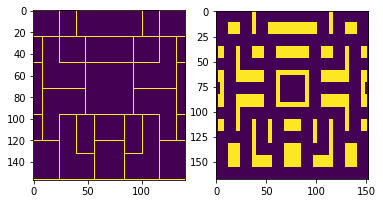

In [39]:
plt.subplot(1, 2, 1)
plt.imshow(_filter)

plt.subplot(1, 2, 2)
plt.imshow(screen)
plt.savefig(fname="figura", dpi=200)
plt.show()

np.save("saved_objects/rails_matrix.npy", arr=_filter)